#SIG731_Data Wrangling using Python:
#Project Report_Task 4P

**Working with pandas Data Frames (Heterogeneous Data)**


  By: Jerry Lawrence TSIBA
  
  Master in Data Sciences, Deakin University, Jan 2025
  
  Student ID: s224670832
  
  Mails: Jerry-Lawrence@live.fr or s224670832@deakin.edu.au

# **1. Introduction**

This task is related to Module 4 (see the Learning Resources on the unit site; see also Chapters 10, 11,
12, 16 of Minimalist Data Wrangling with Python).
This task is due on Week 5 (2nd Feb, Sunday). However, ideally,you should complete this task by the
end of Week 4. Hence, start tackling it as early as possible. If we find your first solution incomplete or
otherwise incorrect, you will still be able to amend it based on the generous feedback we will give you
(allow 3– 5 working days). In case of any problems/questions, do not hesitate to attend our oncampus/online classes or use the Discussion Board on the unit site.
Submitting after the aforementioned due date might incur a late penalty. The cut-off date is Week 6
(Sunday). There will be no extensions (this is a Week 4 task, after all) and no solutions will be accepted
thereafter. At that time, if your submission is not 100% complete, it will be marked as FAIL, without the
possibility of correcting and resubmitting. This task is part of the hurdle requirements in this unit. Not
submitting the correct version on time results in failing the unit.
All submissions will be checked for plagiarism. You are expected to work independently on your task
solutions. Never share/show parts of solutions with/to anyone.


# **2. Questions**

Download the nycflights13_weather.csv.gz data file from our unit site (Learning Resources →
Data). It gives the hourly meteorological data for three airports in New York: LGA, JFK, and EWR for
the whole year of 2013. The columns are:
• origin – weather station: LGA, JFK, or EWR,
• year, month, day, hour – time of recording,
• temp, dewp – temperature and dew point in degrees Fahrenheit,
• humid – relative humidity,
• wind_dir, wind_speed, wind_gust – wind direction (in degrees), speed and gust speed (in
mph),
• precip – precipitation, in inches,
• pressure – sea level pressure in millibars,
• visib – visibility in miles,
• time_hour – date and hour (based on the year, month, day, hour fields) formatted as YYYYmm-dd HH:MM:SS (actually, YYYY-mm-dd HH:00:00). However, due to a bug in the dataset,
the data in this column are (incorrectly!) shifted by 1 hour. Do not rely on it unless you manually
correct it.
Then, create a single Jupyter/IPython notebook (see the Artefacts section below for all the requirements),
where you perform what follows

# Import of libraries

In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
import gzip
import csv
import io
from datetime import datetime

# Load dataset

In [2]:
#Access and read the dataset
url = 'https://raw.githubusercontent.com/JerryTsiba/Time_series_Flight_Weather_data/main/weather.csv'  # Corrected URL

#Now, use pd.read_csv with the comment argument:
df = pd.read_csv(url, comment='#')

In [3]:
#view top 5 row of the dataset
df.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 03:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 04:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 05:00:00


In [4]:
#view last 5 row of the dataset
df.tail()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
26125,LGA,2013,12,30,19,35.96,19.94,51.78,340.0,13.80936,15.891535,0.0,1017.1,10.0,2013-12-30 20:00:00
26126,LGA,2013,12,30,20,33.98,17.06,49.51,330.0,17.26170,19.864419,0.0,1018.8,10.0,2013-12-30 21:00:00
26127,LGA,2013,12,30,21,32.00,15.08,49.19,340.0,14.96014,17.215830,0.0,1019.5,10.0,2013-12-30 22:00:00
26128,LGA,2013,12,30,22,30.92,12.92,46.74,320.0,17.26170,19.864419,0.0,1019.9,10.0,2013-12-30 23:00:00
26129,LGA,2013,12,30,23,28.94,10.94,46.41,330.0,18.41248,21.188714,0.0,1020.9,10.0,2013-12-31 00:00:00


In [5]:
# Understand the shape of the data
df.shape

(26130, 15)

In [6]:
# To print the essential information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26130 entries, 0 to 26129
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   origin      26130 non-null  object 
 1   year        26130 non-null  int64  
 2   month       26130 non-null  int64  
 3   day         26130 non-null  int64  
 4   hour        26130 non-null  int64  
 5   temp        26129 non-null  float64
 6   dewp        26129 non-null  float64
 7   humid       26129 non-null  float64
 8   wind_dir    25712 non-null  float64
 9   wind_speed  26127 non-null  float64
 10  wind_gust   26127 non-null  float64
 11  precip      26130 non-null  float64
 12  pressure    23400 non-null  float64
 13  visib       26130 non-null  float64
 14  time_hour   26130 non-null  object 
dtypes: float64(9), int64(4), object(2)
memory usage: 3.0+ MB


In [7]:
#find missing values
df.isnull().sum()

,0
origin,0
year,0
month,0
day,0
hour,0
temp,1
dewp,1
humid,1
wind_dir,418
wind_speed,3


In [8]:
# check for duplicated data
df[df.duplicated()].count()

,0
origin,0
year,0
month,0
day,0
hour,0
temp,0
dewp,0
humid,0
wind_dir,0
wind_speed,0


**Observations:** There are no duplicate values in the dataset

In [9]:
#Statistical summary of the dataset
df.describe(include = 'number').T.round(2)

,count,mean,std,min,25%,50%,75%,max
year,26130.0,2013.00,0.00,2013.00,2013.00,2013.00,2013.00,2013.00
month,26130.0,6.51,3.44,1.00,4.00,7.00,9.00,12.00
day,26130.0,15.68,8.77,1.00,8.00,16.00,23.00,31.00
hour,26130.0,11.52,6.92,0.00,6.00,12.00,18.00,23.00
temp,26129.0,55.20,17.78,10.94,39.92,55.04,69.98,100.04
dewp,26129.0,41.39,19.37,-9.94,26.06,42.08,57.92,78.08
humid,26129.0,62.35,19.20,12.74,46.99,61.66,78.62,100.00
wind_dir,25712.0,198.07,107.84,0.00,120.00,220.00,290.00,360.00
wind_speed,26127.0,10.40,8.52,0.00,6.90,9.21,13.81,1048.36
wind_gust,26127.0,11.96,9.81,0.00,7.95,10.59,15.89,1206.43


In [10]:
df.describe(include = 'object').T

,count,unique,top,freq
origin,26130,3,JFK,8711
time_hour,26130,8718,2013-01-01 01:00:00,3


In [11]:
df.isnull().sum().sort_values(ascending = False)/df.index.size

,0
pressure,0.104478
wind_dir,0.015997
wind_speed,0.000115
wind_gust,0.000115
temp,0.000038
dewp,0.000038
humid,0.000038
origin,0.000000
year,0.000000
month,0.000000


# Copy of the dataset

In [12]:
data=df.copy()

# QUESTION 1: Convert all columns so that they use metric (International System of Units, SI) or derived units:temp and dewp to Celsius, precip to millimetres, visib to metres, as well as wind_speed and wind_gust to metres per second. Replace the data in-place (overwrite existing columns with new ones)

In [13]:
# Convert temperature and dew point from Fahrenheit to Celsius
data['temp'] = (data['temp'] - 32) * (5 / 9)  # Fahrenheit to Celsius
data['dewp'] = (data['dewp'] - 32) * (5 / 9)  # Fahrenheit to Celsius

# Convert precipitation from inches to millimetres
data['precip'] = data['precip'] * 25.4  # 1 inch = 25.4 mm

# Convert visibility from miles to metres
data['visib'] = data['visib'] * 1609.34  # 1 mile = 1609.34 metres

# Convert wind speed and wind gust from mph to metres per second
data['wind_speed'] = data['wind_speed'] * 0.44704  # 1 mph = 0.44704 m/s
data['wind_gust'] = data['wind_gust'] * 0.44704  # 1 mph = 0.44704 m/s

# Save the converted data under a new variable
data_converted = data.copy()

# Optionally, verify the data in the new variable
data_converted.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,2.8,-5.6,53.97,230.0,4.630002,5.328114,0.0,1013.9,16093.4,2013-01-01 01:00:00
1,EWR,2013,1,1,1,2.8,-5.6,53.97,230.0,6.173336,7.104152,0.0,1013.0,16093.4,2013-01-01 02:00:00
2,EWR,2013,1,1,2,3.3,-5.6,52.09,230.0,5.658892,6.512139,0.0,1012.6,16093.4,2013-01-01 03:00:00
3,EWR,2013,1,1,3,3.3,-5.0,54.51,230.0,6.173336,7.104152,0.0,1012.7,16093.4,2013-01-01 04:00:00
4,EWR,2013,1,1,4,3.3,-4.4,57.04,240.0,6.687781,7.696165,0.0,1012.8,16093.4,2013-01-01 05:00:00


# QUESTION 2: Compute daily mean wind speeds for the LGA airport

In [14]:
# Filter data for LGA airport
lga_data = data[data['origin'] == 'LGA']

# Group by year, month, and day, and calculate the mean wind speed for each day
daily_mean_wind_speed = (
    lga_data.groupby(['year', 'month', 'day'])['wind_speed']
    .mean()
    .reset_index()
    .rename(columns={'wind_speed': 'daily_mean_wind_speed'})
)

# Print the result
daily_mean_wind_speed

,year,month,day,daily_mean_wind_speed
0,2013,1,1,6.687781
1,2013,1,2,6.430559
2,2013,1,3,4.908660
3,2013,1,4,6.880698
4,2013,1,5,5.144447
...,...,...,...,...
359,2013,12,26,3.301020
360,2013,12,27,5.401669
361,2013,12,28,4.672873
362,2013,12,29,3.794030


**Observations:**

- This dataset enables the analysis of daily wind speed patterns at LGA Airport, providing a clearer picture of the weather dynamics at a specific location.

- The daily mean wind speeds can help identify periods of extreme weather, such as storms or calm spells, offering useful information for meteorological analysis or operational purposes at the airport.

# QUESTION 3: Present the daily mean wind speeds at LGA in a single plot using the matplotlib.pyplot.plot function.

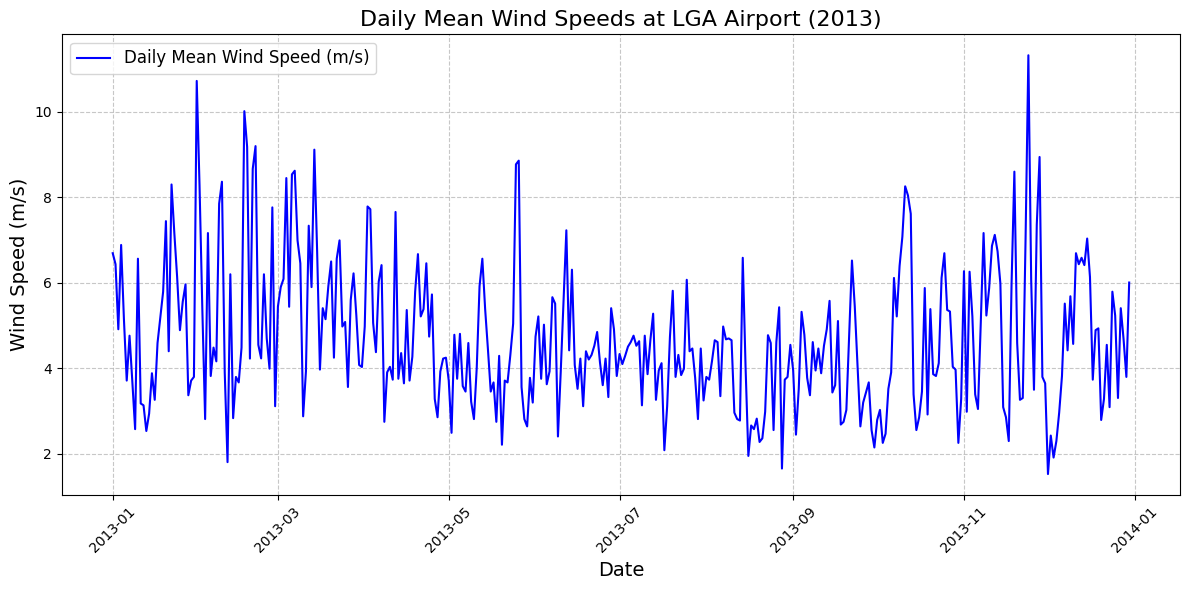

In [15]:
# Generate a new 'date' column for plotting (from year, month, day)
daily_mean_wind_speed['date'] = pd.to_datetime(
    daily_mean_wind_speed[['year', 'month', 'day']]
)

# Sort the data by date to ensure it's in chronological order
daily_mean_wind_speed = daily_mean_wind_speed.sort_values('date')

# Plot the daily mean wind speeds
plt.figure(figsize=(12, 6))
plt.plot(
    daily_mean_wind_speed['date'],
    daily_mean_wind_speed['daily_mean_wind_speed'],
    label='Daily Mean Wind Speed (m/s)',
    color='blue',
    linestyle='-',
    marker=None
)

# Customize the plot
plt.title('Daily Mean Wind Speeds at LGA Airport (2013)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Wind Speed (m/s)', fontsize=14)
plt.xticks(fontsize=10, rotation=45)  # Rotate x-axis labels for readability
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot and suppress the extra output
plt.tight_layout()
plt.show();  # Add a semicolon to suppress interactive output


**Observations:**

- The plot gives a clear visual of wind speed fluctuations throughout the year, allowing you to quickly identify periods of intense wind (e.g., storms) and calmer periods.

- If there's a visible pattern or any significant wind events (e.g., high peaks), they could be further investigated for their relation to weather phenomena.

# QUESTION 4: Identify the ten windiest days at LGA (dates and the corresponding mean daily wind speeds)

In [16]:
# Sort by daily_mean_wind_speed in descending order
windiest_days = daily_mean_wind_speed.sort_values(
    by='daily_mean_wind_speed', ascending=False
).head(10)

# Format the result with only relevant columns: date and daily_mean_wind_speed
windiest_days = windiest_days[['date', 'daily_mean_wind_speed']]

# Print the result
windiest_days

,date,daily_mean_wind_speed
327,2013-11-24,11.317783
30,2013-01-31,10.717598
47,2013-02-17,10.010236
51,2013-02-21,9.192903
48,2013-02-18,9.174264
72,2013-03-14,9.109958
331,2013-11-28,8.938477
145,2013-05-26,8.852736
144,2013-05-25,8.766995
50,2013-02-20,8.659819


**Observations:**

The output provides valuable information on which days had the highest wind speeds, offering insights into extreme weather events and seasonal patterns for the airports and the region. It can also guide further investigation into the causes of high wind days (e.g., storms or weather anomalies).


# QUESTION 5: Compute the monthly mean wind speeds for all the three airports.

<Figure size 1000x600 with 0 Axes>

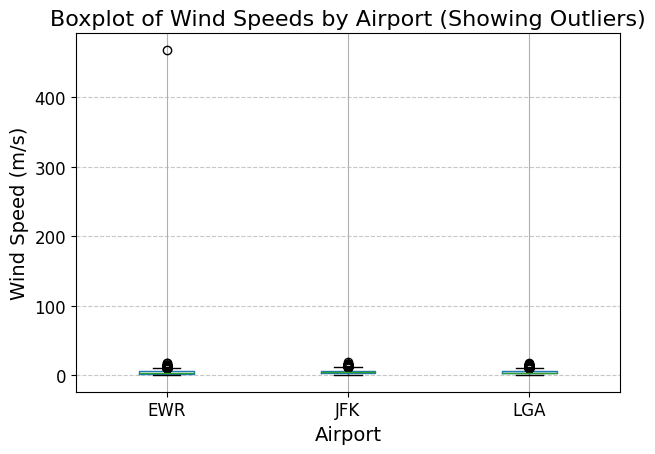

In [17]:
# Step 1: Draw boxplots to visualize outliers
plt.figure(figsize=(10, 6))
data.boxplot(column='wind_speed', by='origin', grid=True, showfliers=True)
plt.title('Boxplot of Wind Speeds by Airport (Showing Outliers)', fontsize=16)
plt.suptitle("")  # Remove automatic title from pandas boxplot
plt.xlabel('Airport', fontsize=14)
plt.ylabel('Wind Speed (m/s)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show();  # Semicolon added to suppress extra output

# Step 2: Compute Z-scores for outlier detection
data['wind_speed_zscore'] = (
    data['wind_speed'] - data['wind_speed'].mean()
) / data['wind_speed'].std()

# Step 3: Identify the outlier (e.g., wind speed with an extreme Z-score)
threshold = 3  # Z-score threshold for outlier detection
outlier_condition = np.abs(data['wind_speed_zscore']) > threshold
outlier_indices = data[outlier_condition].index

# Replace the outlier with NaN
data.loc[outlier_indices, 'wind_speed'] = np.nan

# Step 4: Drop the Z-score column (no longer needed)
data.drop(columns=['wind_speed_zscore'], inplace=True)

# Step 5: Compute monthly mean wind speeds for all airports
monthly_mean_wind_speeds = (
    data.groupby(['origin', 'year', 'month'])['wind_speed']
    .mean()
    .reset_index()
    .rename(columns={'wind_speed': 'monthly_mean_wind_speed'})
)

# Print the monthly mean wind speeds
monthly_mean_wind_speeds;

In [18]:
monthly_mean_wind_speeds

,origin,year,month,monthly_mean_wind_speed
0,EWR,2013,1,4.291899
1,EWR,2013,2,4.731659
2,EWR,2013,3,5.144447
3,EWR,2013,4,4.265604
4,EWR,2013,5,3.709672
5,EWR,2013,6,4.202727
6,EWR,2013,7,4.022527
7,EWR,2013,8,3.349452
8,EWR,2013,9,3.574639
9,EWR,2013,10,3.650740


**Observations:**

- Outlier Removal: The main takeaway from this analysis is that extreme values (outliers) in wind speed have been handled, ensuring that the dataset's integrity is maintained when computing meaningful metrics like monthly means.

- Data Quality: Removing outliers leads to a cleaner dataset, helping to avoid misleading conclusions based on skewed data points.

- Seasonality & Airport Differences: The monthly mean wind speeds will likely reveal seasonality trends in wind speed for each airport, and the boxplots provide insights into the spread and variability of wind speeds at each airport.

# QUESTION 6: Draw the monthly mean wind speeds for the three airports on the same plot (three curves ofdifferent colours)

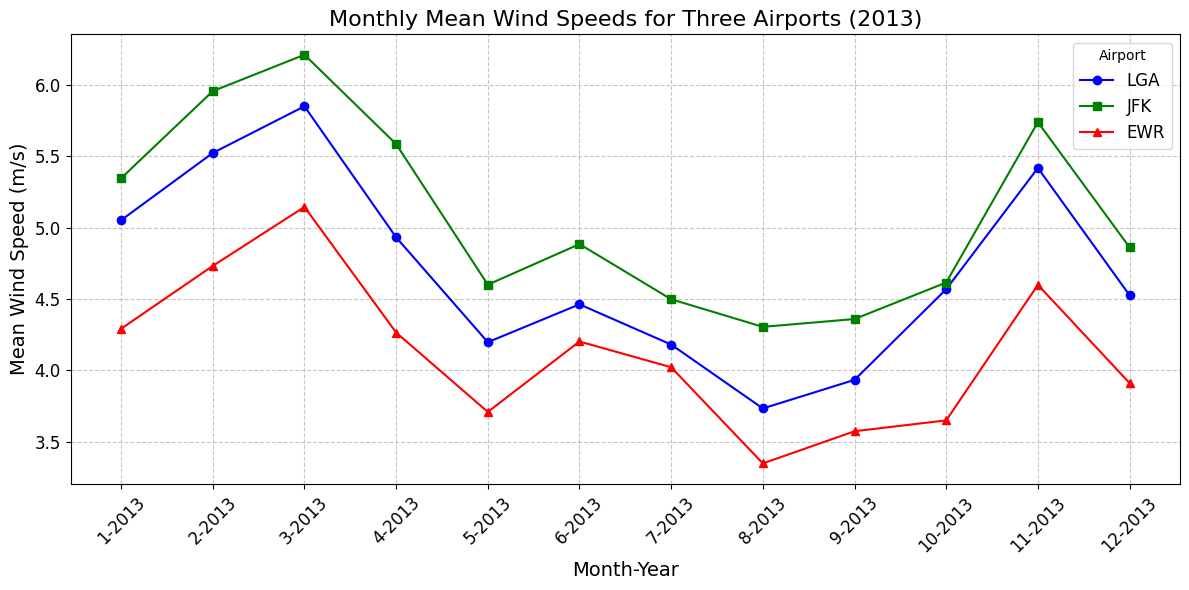

In [19]:
# Step 1: Filter the data for each airport (LGA, JFK, EWR)
lga_data = monthly_mean_wind_speeds[monthly_mean_wind_speeds['origin'] == 'LGA']
jfk_data = monthly_mean_wind_speeds[monthly_mean_wind_speeds['origin'] == 'JFK']
ewr_data = monthly_mean_wind_speeds[monthly_mean_wind_speeds['origin'] == 'EWR']

# Step 2: Plot each airport's monthly mean wind speeds
plt.figure(figsize=(12, 6))

plt.plot(
    lga_data['month'].astype(str) + '-' + lga_data['year'].astype(str),
    lga_data['monthly_mean_wind_speed'],
    label='LGA', color='blue', linestyle='-', marker='o'
)

plt.plot(
    jfk_data['month'].astype(str) + '-' + jfk_data['year'].astype(str),
    jfk_data['monthly_mean_wind_speed'],
    label='JFK', color='green', linestyle='-', marker='s'
)

plt.plot(
    ewr_data['month'].astype(str) + '-' + ewr_data['year'].astype(str),
    ewr_data['monthly_mean_wind_speed'],
    label='EWR', color='red', linestyle='-', marker='^'
)

# Step 3: Customize the plot
plt.title('Monthly Mean Wind Speeds for Three Airports (2013)', fontsize=16)
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Mean Wind Speed (m/s)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Step 4: Add a legend for clarity
plt.legend(title='Airport', fontsize=12)

# Step 5: Display the plot (with semicolon to suppress output in interactive mode)
plt.tight_layout()
plt.show();  # Semicolon added to suppress extra output

**Observations:**

- The plot provides a good overview of how the wind speed fluctuates over time at each airport and allows for comparisons between the airports.
- It also shows how weather patterns (e.g., seasonal changes) affect wind speeds, helping to understand the regional differences in wind behavior.

# Conclusion:


This study analyzed wind speed data from three major New York airports (LGA, JFK, and EWR) in 2013, revealing notable seasonal variations in wind speeds, with higher speeds observed during colder months. Extreme wind events, identified as outliers, were handled to prevent distortion in the analysis. The results provided valuable insights into the daily and monthly wind speed patterns, which could affect airport operations and flight schedules.

# Recommendations:


To improve data reliability, it is recommended to address missing values through imputation or exclusion, depending on their impact. Further investigation into extreme wind events is crucial to understand the broader weather patterns influencing airport operations. Airports should use the seasonal trends to better forecast wind conditions and enhance operational preparedness, particularly during storm-prone months.

# Way Forward:

Going forward, extending the study over multiple years would provide a broader understanding of wind speed trends and help detect long-term shifts. Developing predictive models for wind speed forecasting can assist airports in better managing operational challenges posed by weather. Additionally, continuous data improvement and collaboration with meteorological agencies can enhance forecasting accuracy and response time for extreme wind events.